In [1]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense, Flatten, Input, BatchNormalization, ZeroPadding2D, AveragePooling2D


visible = Input(shape=(224, 224, 3))

conv1 = Conv2D(16, (3,3), padding='same', kernel_initializer = 'normal', activation='relu')(visible)
normal1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(normal1)
conv2 = Conv2D(32, (3,3), padding='same', kernel_initializer = 'normal', activation='relu')(pool1)
normal2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(normal2)

conv3 = Conv2D(16, (1,1), kernel_initializer = 'normal', activation='relu')(pool2)
normal3 = BatchNormalization()(conv3)
conv4 = Conv2D(128, (3,3), padding='same', kernel_initializer = 'normal', activation='relu')(normal3)
normal4 = BatchNormalization()(conv4)
conv5 = Conv2D(16, (1,1), kernel_initializer = 'normal', activation='relu')(normal4)
normal5 = BatchNormalization()(conv5)

conv6 = Conv2D(128, (3,3), padding='same', kernel_initializer = 'normal', activation='relu')(normal5)
normal6 = BatchNormalization()(conv6)
pool6 = MaxPooling2D(pool_size=(2,2))(normal6)

conv7 = Conv2D(32, (1,1), kernel_initializer = 'normal', activation='relu')(pool6)
normal7 = BatchNormalization()(conv7)
conv8 = Conv2D(256, (3,3),padding='same', kernel_initializer = 'normal', activation='relu')(normal7)
normal8 = BatchNormalization()(conv8)
conv9 = Conv2D(32, (1,1), kernel_initializer = 'normal', activation='relu')(normal8)
normal9 = BatchNormalization()(conv9)
conv10 = Conv2D(256, (3,3), padding='same', kernel_initializer = 'normal', activation='relu')(normal9)
normal10 = BatchNormalization()(conv10)
pool8 = MaxPooling2D(pool_size=(4,4), strides=(4,4))(normal10)

avg = AveragePooling2D((7,7))(pool8)

output1 = Conv2D(11, (1,1), kernel_initializer = 'normal', activation = 'softmax')(avg)
output2 = Conv2D(11, (1,1),  kernel_initializer = 'normal', activation = 'softmax')(avg)
output3 = Conv2D(11, (1,1), kernel_initializer = 'normal', activation = 'softmax')(avg)
output4 = Conv2D(11, (1,1), kernel_initializer = 'normal', activation = 'softmax')(avg)

model = Model(inputs = visible, outputs = [output1, output2, output3, output4])

model.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy','categorical_crossentropy'], metrics=['accuracy'])
model.summary()


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 16) 0           batch_normalization_1[0][0]      
_____________________________________

In [138]:
training_img_paths = []
validation_img_paths = []


for i in range(500, 5000):
    training_img_paths += ['digits data/boards/training/board_'+str(i)+'.jpg']
    
for i in range(500):
    validation_img_paths += ['digits data/boards/validation/board_'+str(i)+'.jpg']

In [139]:
training_data_paths = []
validation_data_paths = []


for i in range(500, 5000):
    training_data_paths += ['digits data/boards held/training/data_'+str(i)+'.jpg']
    
for i in range(500):
    validation_data_paths += ['digits data/boards held/validation/data_'+str(i)+'.jpg']

In [30]:
training_boards2_paths = []
validation_boards2_paths = []

for i in range(1500):
    validation_boards2_paths += ['digits data/boards2/validation/board_'+str(i)+'.jpg']
    
for i in range (1500, 14641):
    training_boards2_paths += ['digits data/boards2/training/board_'+str(i)+'.jpg']

In [63]:
import os

def load_paths(path):
    paths = []
    for file in os.listdir(path):
        if file == '.DS_Store':
            continue
        paths += [path +'/'+ file]
    return paths

In [64]:
training_data_paths = load_paths('digits data/boards held4/training')
validation_data_paths = load_paths('digits data/boards held4/validation')

In [65]:
import cv2 
import numpy as np

def get_input(path):
    img = cv2.imread(path)
    return img 

In [66]:
def preprocess_input(img):
    #brightness, rotate, shear of random values 
    beta = np.random.randint(50)
    new_img = cv2.convertScaleAbs(img, alpha=1.0, beta=beta)
    return new_img

In [67]:
def get_output(path):
    output1 = np.zeros((1,1,11))
    output2 = np.zeros((1,1,11))
    output3 = np.zeros((1,1,11))
    output4 = np.zeros((1,1,11))
    
    img_id = path.split('-')[-1].split('.')[0]
    label = np.load('digits data/labels2/label_'+img_id+'.npy')
    
    output1[0][0][label[0]] = 1
    output2[0][0][label[1]] = 1
    output3[0][0][label[2]] = 1
    output4[0][0][label[3]] = 1
    
    return output1, output2, output3, output4

In [68]:
def image_generator(files, batch_size):
    
    while True:
        # Select files (paths/indices) for the batch
        batch_paths = np.random.choice(a = files, 
                                         size = batch_size)
        batch_input = []
        batch_output1 = [] 
        batch_output2 = []
        batch_output3 = []
        batch_output4 = []
          
        # Read in each input, perform preprocessing and get labels
        for input_path in batch_paths:
            img = get_input(input_path)
            batch_output = get_output(input_path)

            new_img = preprocess_input(img) 
            batch_input += [ new_img ]
            batch_output1 += [ batch_output[0] ]
            batch_output2 += [ batch_output[1] ]
            batch_output3 += [ batch_output[2] ]
            batch_output4 += [ batch_output[3] ]
            
        # Return a tuple of (input,output) to feed the network
        batch_x = np.array( batch_input )
        batch_y1 = np.array( batch_output1 )
        batch_y2 = np.array( batch_output2 )
        batch_y3 = np.array( batch_output3 )
        batch_y4 = np.array( batch_output4 )
        
        yield( batch_x, [batch_y1, batch_y2, batch_y3, batch_y4])

In [69]:
batch_size = 32

training_gen = image_generator(training_data_paths, batch_size)
validation_gen = image_generator(validation_data_paths, batch_size)

In [ ]:
model.fit_generator(training_gen, steps_per_epoch=125, epochs=5, validation_data=validation_gen, 
                   validation_steps=20)

Epoch 1/5
125/125 [==============================] - 1113s 9s/step - loss: 9.7726 - conv2d_11_loss: 2.4112 - conv2d_12_loss: 2.4312 - conv2d_13_loss: 2.4540 - conv2d_14_loss: 2.4762 - conv2d_11_acc: 0.1230 - conv2d_12_acc: 0.1150 - conv2d_13_acc: 0.0960 - conv2d_14_acc: 0.0963 - val_loss: 50.7208 - val_conv2d_11_loss: 13.4115 - val_conv2d_12_loss: 14.3194 - val_conv2d_13_loss: 8.6984 - val_conv2d_14_loss: 14.2915 - val_conv2d_11_acc: 0.0953 - val_conv2d_12_acc: 0.1031 - val_conv2d_13_acc: 0.0922 - val_conv2d_14_acc: 0.0969
Epoch 2/5
124/125 [============================>.] - ETA: 11s - loss: 9.3105 - conv2d_11_loss: 2.2821 - conv2d_12_loss: 2.2027 - conv2d_13_loss: 2.4021 - conv2d_14_loss: 2.4236 - conv2d_11_acc: 0.1661 - conv2d_12_acc: 0.1711 - conv2d_13_acc: 0.1048 - conv2d_14_acc: 0.0834

In [51]:
import h5py 
model.save_weights('src/first_try_digits.h5')

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))
(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))
(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))
(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))
(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1.

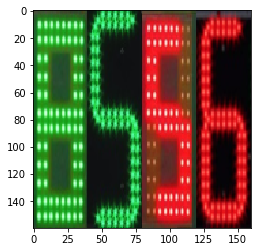

In [78]:
import cv2 
import matplotlib.pyplot as plt
for i, path in enumerate(validation_img_paths) : 
    
    #rd = np.random.randint(500, 4500)
    if(i<5):
        img = get_input(path)
        img = preprocess_input(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        out = get_output(path)
        print(out)

In [17]:
out = get_output('digits data/boards held/training/data_'+str(rd)+'.jpg')
print(out)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))


In [18]:
img = get_input('digits data/boards held4/training/data_4-12700.jpg')
print(img.size)

(224, 224, 3)
150528


In [27]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np


print(get_output('digits data/boards2/training/board_12843.jpg')[0][0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
questions : 
    in the get_output does the 4 np.zeros(11) make the thing longer ? allocate memory elsewhere ???
    where to do the maxpool ? how many ?
    max number of parameters ? 
    
    
    224 x 224 
    
    4 max pools
    